In [116]:
import os
import soundfile  as sf
import matplotlib.pyplot as plt
import numpy as np
import librosa
from util import audio,my_util
import copy as cp
import scipy
from scipy.signal import find_peaks
import IPython.display as ipd

EQ_f_tbl = [100,125,160,200,250,315,400,500,630,800,1000,1250,1600,2000,2500,3200,4000,5000]

a2i = [0,23,22,24,24,13,6,-2,-10,-24,-24,-24,-20,-5,7,13,10,0]
a2u = [0,-2,16,15,17,20,14,9,3,9,-20,-23,-22,-21,-3,-5,0,0]
a2e = [0,0,0,0,0,8,16,10,-1,-13,-22,-10,5,0,0,0,0,0]
a2o = [0,0,0,0,0,0,11,16,16,13,-4,-16,-10,0,0,0,0,0]

def amp2db(x):
    return 20 * np.log10(np.maximum(1e-5, x))
def db2amp(x):
    return np.power(10.0, x * 0.05)
my_util.wavPlayer('./my_a.wav')
my_util.wavPlayer('./my_i.wav')
my_util.wavPlayer('./my_u.wav')
my_util.wavPlayer('./my_e.wav')
my_util.wavPlayer('./my_o.wav')
def modify_specEnv(X,curve):
    assert(X.shape[0] ==len(curve))
    _X = cp.copy(X)
    for i in range(_X.shape[1]):
        _X[:,i] *= curve 
    return _X
def get_curve_by_tbl(nfft = 2048,kernel = a2i,fs = 44100):
    freq_X = np.fft.fftfreq(nfft, d=1/fs)[:int(nfft/2)+1]
    curve = scipy.interpolate.spline(EQ_f_tbl,kernel,freq_X)
    return db2amp(curve)

C:\Users\a1989\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: `spline` is deprecated!
spline is deprecated in scipy 0.19.0, use Bspline class instead.
  """


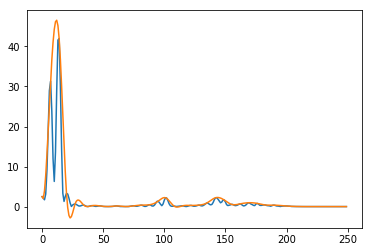

In [203]:
seg = cp.copy(absi[:250,10])
# seg = cp.copy(absA01[:250,which_seg])
peaks,_ = find_peaks(seg, distance=5)
peaks =  np.insert(peaks, 0, 0, axis=0)
c = scipy.interpolate.spline(peaks,seg[peaks],range(250))
plt.plot(seg)
plt.plot(c)
plt.show()

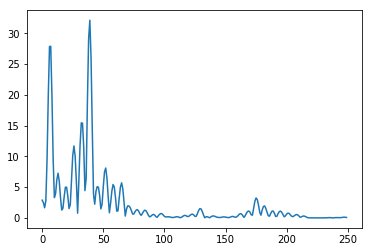

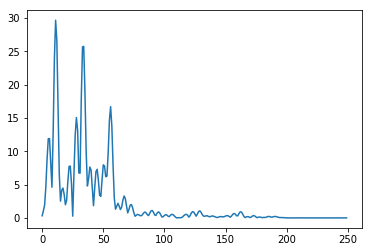

In [209]:
my_A,_ = getAmpPha('my_a.wav')
A_01,_ = getAmpPha('a_01.wav')
plt.plot(my_A[:250,10])
# plt.plot(A_01[:250,10]*2.5)
plt.show()
plt.plot(A_01[:250,10]*2.5)
plt.show()

C:\Users\a1989\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: DeprecationWarning: `spline` is deprecated!
spline is deprecated in scipy 0.19.0, use Bspline class instead.
  del sys.path[0]
C:\Users\a1989\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: DeprecationWarning: `spline` is deprecated!
spline is deprecated in scipy 0.19.0, use Bspline class instead.
  


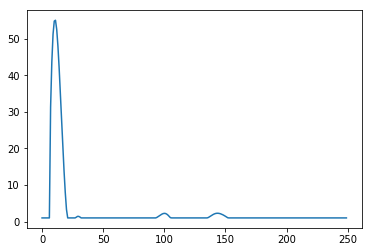

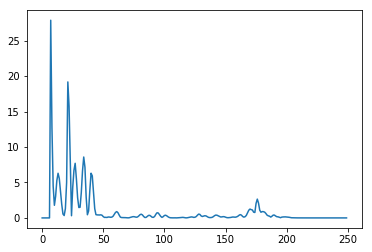

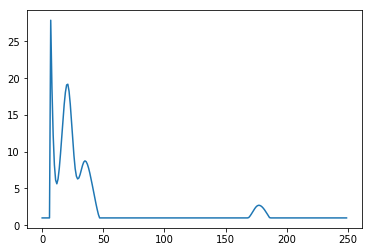

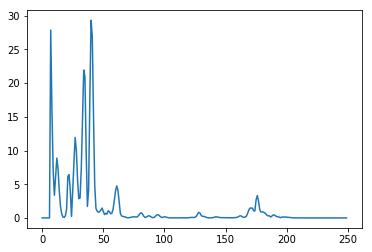

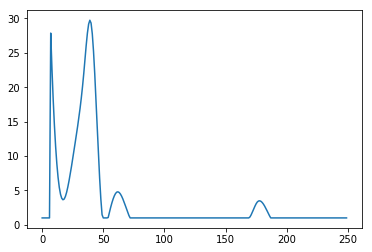

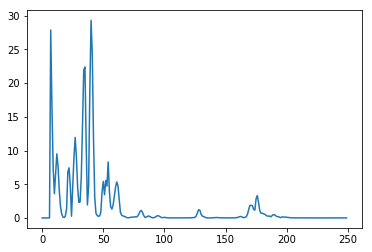

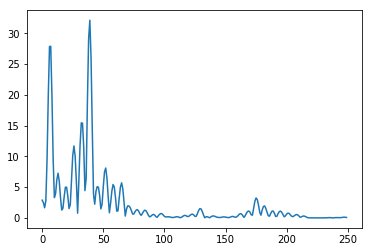

In [251]:
frame_period = 10
which_seg = 10
showN = 250
def getAmpPha(src):
    x,fs = sf.read(src)
    X = librosa.stft(x,n_fft=2048,win_length = 1024, hop_length=int(44100/(1000/frame_period)))
    absX = np.abs(X)
    phaX = X/absX
    return absX,phaX
def getCurve(seg_A,seg_B):
    peaks_A, _ = find_peaks(seg_A, distance=5)
    peaks_B, _ = find_peaks(seg_B, distance=5)
    c1 = scipy.interpolate.spline(peaks_A,seg_A[peaks_A],range(showN))
    c2 = scipy.interpolate.spline(peaks_B,seg_B[peaks_B],range(showN))
    c1 = np.maximum(c1,1.0)
    curve = c2/c1
    plt.plot(c1)
    plt.show()
    return curve
absi,phai = getAmpPha('my_i.wav')
# absA01,_ = getAmpPha('a_01.wav')
absA01,_ = getAmpPha('my_a.wav')


###################################
seg_A = cp.copy(absi[:250,which_seg])
seg_B = cp.copy(absA01[:250,which_seg])
curve_ = getCurve(seg_A,seg_B)
# plt.plot(seg_B)
seg_A *= curve_

plt.plot(seg_A)
plt.show()

for _ in range(2):
    curve_tmp = getCurve(seg_A,seg_B)
#     curve_tmp[45:55]*=4
    
    curve_ *= curve_tmp
#     plt.plot(seg_B)
    

    seg_A *= curve_tmp
    plt.plot(seg_A)
    plt.show()

    

curve = np.ones((1025,))

curve[:250] = curve_
out = modify_specEnv(absi,curve)
xx = librosa.istft(out*phai,hop_length=int(44100/(1000/frame_period)))
xx = xx/max(xx)*0.8
plt.plot(seg_B)
plt.show()

ipd.Audio(xx, rate=fs)



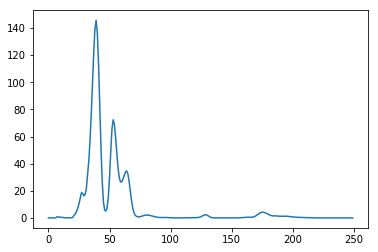

In [233]:
c = cp.copy(curve_)
# c[40:60]
plt.plot(c)
plt.show()

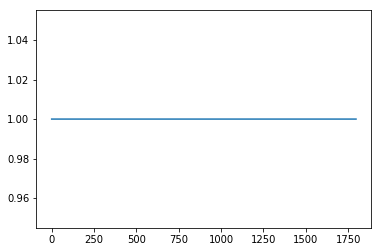

In [173]:
# foo = get_curve_by_tbl(2048,a2i)
foo = np.ones((2048,))
plt.plot(foo[250:])

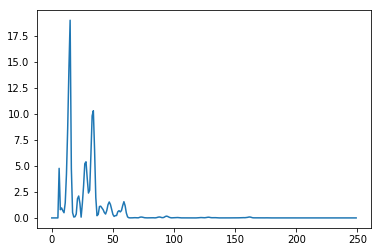

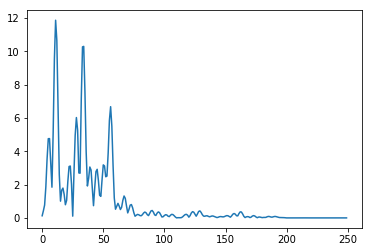

In [160]:
plt.plot(out[:250,10])
# plt.plot(c1)

plt.show()
plt.plot(absA01[:250,10])
plt.show()

# plt.show()

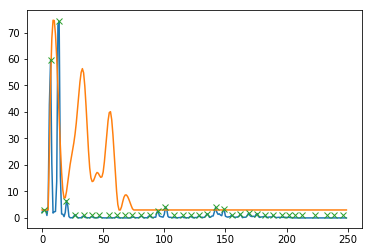

In [63]:
plt.plot(absi[:250,10])
plt.plot(c1[:250]*3)

plt.plot(peaks_i, c2[peaks_i], "x")
plt.show()

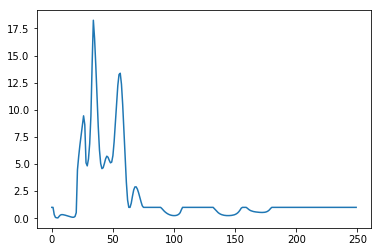

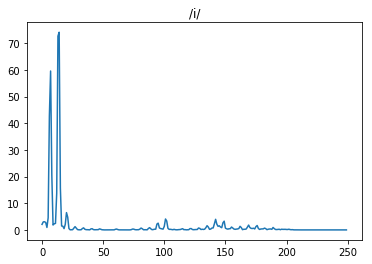

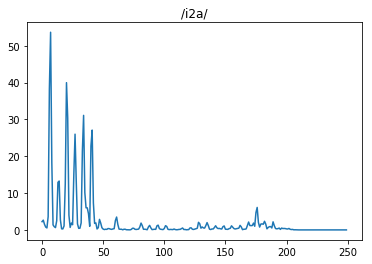

In [17]:
plt.plot(curve_)
plt.show()
tmp,fs = sf.read('my_i.wav')
pSpec(tmp,'/i/')  
tmp,fs = sf.read('test2.wav')
pSpec(tmp,'/i2a/')  

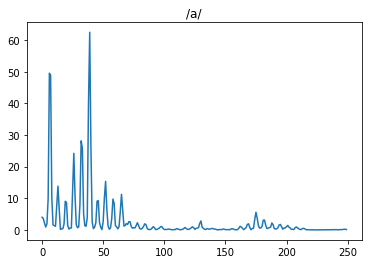

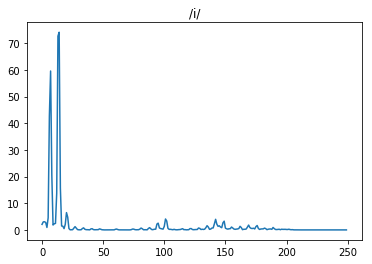

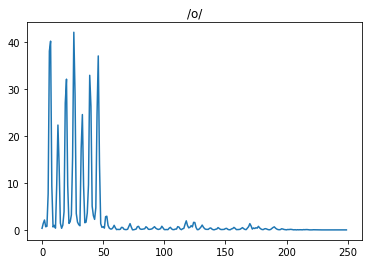

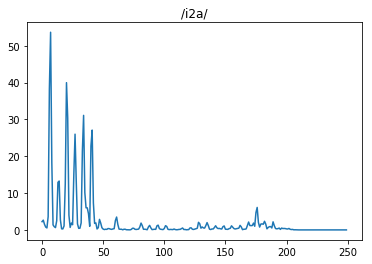

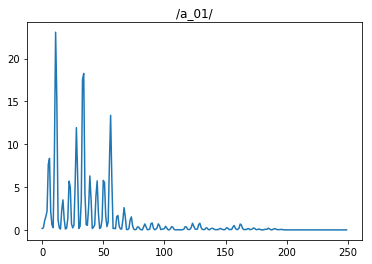

In [14]:
def pSpec(x,t = 'spec',which = 10):
    X = librosa.stft(x,n_fft=2048, hop_length=int(44100/(1000/frame_period)))
    absX = np.abs(X)
    plt.title(t)
    plt.plot(absX[:250,which])
    plt.show()
tmp,fs = sf.read('my_a.wav')
pSpec(tmp,'/a/')  
tmp,fs = sf.read('my_i.wav')
pSpec(tmp,'/i/')  
tmp,fs = sf.read('my_o.wav')
pSpec(tmp,'/o/')    

tmp,fs = sf.read('test2.wav')
pSpec(tmp,'/i2a/')  
tmp,fs = sf.read('a_01.wav')
pSpec(tmp,'/a_01/')    


